# Cross-correlation analysis

### Cálculo a mano de la correlación del Artículo

In [1]:
import pandas as pd
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots

3.7.0


#### Parámetros solares + CRI Pierre Auger:

In [2]:

spar = pd.read_csv('solar_parameters/auger_solar_parameter_1D.csv')
spar

,date,sunspots,solarw,CRI
0,1818-01-01,NaN,NaN,NaN
1,1818-01-02,NaN,NaN,NaN
2,1818-01-03,NaN,NaN,NaN
3,1818-01-04,NaN,NaN,NaN
4,1818-01-05,NaN,NaN,NaN
...,...,...,...,...
75143,2023-09-26,17.2,462.0,1661.799868
75144,2023-09-27,18.3,455.0,1661.799868
75145,2023-09-28,9.4,394.0,1661.799868
75146,2023-09-29,9.0,431.0,1661.799868


#### Dataset Neutron Monitor (including Auger)

In [3]:
NM_oulu = pd.read_csv('CRI_auger_NM_3H.csv')
NM_oulu['date'] = pd.to_datetime(NM_oulu['date'])
NM_oulu.set_index('date', inplace=True)
NM_oulu

,oulu,auger,mexico,athenas,roma,tsumeb
date,,,,,,
1990-01-01 00:00:00+00:00,0.835339,NaN,0.934069,NaN,NaN,NaN
1990-01-01 03:00:00+00:00,0.836135,NaN,0.936287,NaN,NaN,0.926468
1990-01-01 06:00:00+00:00,0.840431,NaN,0.934765,NaN,NaN,0.926723
1990-01-01 09:00:00+00:00,0.839158,NaN,0.933133,NaN,NaN,0.925214
1990-01-01 12:00:00+00:00,0.839635,NaN,0.937709,NaN,NaN,0.926668
...,...,...,...,...,...,...
2021-12-30 09:00:00+00:00,1.064302,1.003458,1.037700,1.015503,1.0,1.000000
2021-12-30 12:00:00+00:00,1.065415,1.003458,1.041967,1.015449,1.0,1.000000
2021-12-30 15:00:00+00:00,1.060005,1.003458,1.041962,1.011533,1.0,1.000000


In [4]:
NM_oulu_resampled = NM_oulu.resample('1D').mean()
NM_oulu_resampled

,oulu,auger,mexico,athenas,roma,tsumeb
date,,,,,,
1990-01-01 00:00:00+00:00,0.837845,NaN,0.935828,NaN,NaN,0.927138
1990-01-02 00:00:00+00:00,0.845423,NaN,0.939615,NaN,NaN,0.928254
1990-01-03 00:00:00+00:00,0.855865,NaN,0.942554,NaN,NaN,0.947241
1990-01-04 00:00:00+00:00,0.857615,NaN,0.944799,NaN,NaN,0.929057
1990-01-05 00:00:00+00:00,0.854134,NaN,0.947109,NaN,NaN,0.936858
...,...,...,...,...,...,...
2021-12-26 00:00:00+00:00,1.067325,1.003458,1.040622,1.011276,1.000000,1.000000
2021-12-27 00:00:00+00:00,1.067325,1.003458,1.041681,1.012981,1.000000,1.000000
2021-12-28 00:00:00+00:00,1.059628,1.003458,1.039281,1.010904,0.990197,1.000000


In [5]:
NM_oulu_resampled.reset_index(inplace=True)
NM_oulu_resampled = NM_oulu_resampled[['date','oulu']].copy()
NM_oulu_resampled

,date,oulu
0,1990-01-01 00:00:00+00:00,0.837845
1,1990-01-02 00:00:00+00:00,0.845423
2,1990-01-03 00:00:00+00:00,0.855865
3,1990-01-04 00:00:00+00:00,0.857615
4,1990-01-05 00:00:00+00:00,0.854134
...,...,...
11682,2021-12-26 00:00:00+00:00,1.067325
11683,2021-12-27 00:00:00+00:00,1.067325
11684,2021-12-28 00:00:00+00:00,1.059628
11685,2021-12-29 00:00:00+00:00,1.060523


In [7]:
# Asegurémonos de que las columnas 'date' sean de tipo datetime en ambos DataFrames
spar['date'] = pd.to_datetime(spar['date'])
NM_oulu_resampled['date'] = pd.to_datetime(NM_oulu_resampled['date']).dt.tz_localize(None)


#### Dataset con los datos solares + Pierre Auger + Oulu

In [9]:
merged = pd.merge_asof(spar, NM_oulu_resampled, on='date', direction='backward', tolerance=pd.Timedelta('1D'))

In [10]:
merged

,date,sunspots,solarw,CRI,oulu
0,1818-01-01,NaN,NaN,NaN,NaN
1,1818-01-02,NaN,NaN,NaN,NaN
2,1818-01-03,NaN,NaN,NaN,NaN
3,1818-01-04,NaN,NaN,NaN,NaN
4,1818-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
75143,2023-09-26,17.2,462.0,1661.799868,NaN
75144,2023-09-27,18.3,455.0,1661.799868,NaN
75145,2023-09-28,9.4,394.0,1661.799868,NaN
75146,2023-09-29,9.0,431.0,1661.799868,NaN


# Correlación Olulu - Sunspots

In [11]:
##### FILTRADOOOOO
# Filtrando los datos para el rango de años de enero de 2006 a septiembre de 2021
start_date = '1995-01-01'
end_date = '2021-09-30'
oulu_corr = merged[(merged['date'] >= start_date) & (merged['date'] <= end_date)]
oulu_corr.set_index('date', inplace=True)
oulu_corr = oulu_corr.astype('float64') # 

In [15]:
configure_plots()
# Supongamos que tienes un DataFrame llamado df con las columnas "date", "ScalerCorr", "counts/s" y "sunspots_SSN_f"

# 1. Calcular los valores medios de ambas variables
mean_counts_o = oulu_corr["oulu"].mean()
mean_sunspots_o = oulu_corr["sunspots"].mean()

# 4. Calcular los desplazamientos (\Delta)
max_lag = 30  # Establece el número máximo de desplazamientos a considerar (30 días para incluir hasta el ciclo de hasta ~27 días)

# 5. Calcular las desviaciones estándar normalizadas (\delta_{p} y \delta_{q})
std_counts_o = oulu_corr["oulu"].std()
std_sunspots_o = oulu_corr["sunspots"].std()

# Inicializa una lista para almacenar los coeficientes de correlación cruzada
cross_correlations_o = []

# 6. Aplicar la fórmula de correlación cruzada para cada desplazamiento (\Delta)
for lag in range(-max_lag, max_lag + 1):
    sum_product_o = 0

    for i in range(len(oulu_corr) - abs(lag)):
        diff_counts_o = oulu_corr["oulu"].iloc[i] - mean_counts_o
        diff_sunspots_o = oulu_corr["sunspots"].iloc[i + lag] - mean_sunspots_o
        sum_product_o += diff_counts_o * diff_sunspots_o

    # Calcular el coeficiente de correlación cruzada para el desplazamiento actual
    cross_corr_o = (1 / (len(oulu_corr) - 1)) * (sum_product_o / (std_counts_o * std_sunspots_o))
    cross_correlations_o.append(cross_corr_o)

# Ahora cross_correlations contiene los coeficientes de correlación cruzada para diferentes desplazamientos

# Puedes examinar los resultados, por ejemplo, para un desplazamiento de 0:
lag_0_corr_o = cross_correlations_o[max_lag]
print("Coeficiente de correlación cruzada para desplazamiento 0:", lag_0_corr_o)


Coeficiente de correlación cruzada para desplazamiento 0: -0.6172100527693554


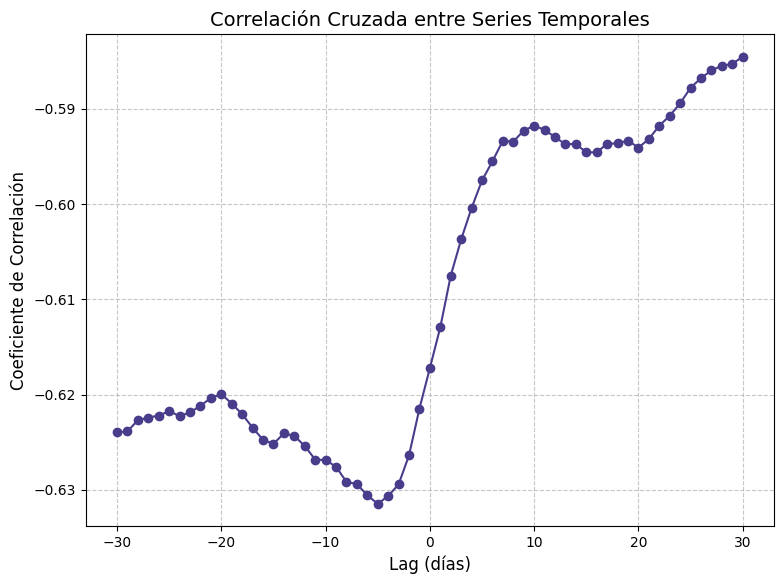

In [16]:

lag_range_o = list(range(-max_lag, max_lag + 1))
plt.plot(lag_range_o, cross_correlations_o, marker='o', linestyle='-', color='darkslateblue')  # Personaliza el color a tu elección
plt.xlabel('Lag (días)')
plt.ylabel('Coeficiente de Correlación')
plt.title('Correlación Cruzada entre Series Temporales')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()


## Oulu vs SUnspots Anual

In [17]:
##### MIRAR POR QUÉ NO ESTÁ FUNCIONANDO...

oulu_year = oulu_corr.resample('Y').mean()  # Cambia 'mean' por 'sum' u otras métricas según lo que necesites.
oulu_year

,sunspots,solarw,CRI,oulu
date,,,,
1995-12-31,3.155068,428.529404,NaN,1.015884
1996-12-31,2.630601,422.620854,NaN,1.034683
1997-12-31,3.262192,380.942466,NaN,1.041404
1998-12-31,6.174795,410.024658,NaN,1.018257
1999-12-31,8.656712,438.660274,NaN,0.987971
2000-12-31,9.510109,447.737705,NaN,0.920378
2001-12-31,10.087123,425.663014,NaN,0.935530
2002-12-31,9.254247,439.684932,NaN,0.923935
2003-12-31,6.560000,542.716343,NaN,0.916402


In [18]:
# 1. Calcular los valores medios de ambas variables
mean_counts_oy = oulu_year["oulu"].mean()
mean_sunspots_oy = oulu_year["sunspots"].mean()

# 4. Calcular los desplazamientos (\Delta)
max_lag = 15  # Establece el número máximo de desplazamientos a considerar

# 5. Calcular las desviaciones estándar normalizadas (\delta_{p} y \delta_{q})
std_counts_oy = oulu_year["oulu"].std()
std_sunspots_oy = oulu_year["sunspots"].std()

# Inicializa una lista para almacenar los coeficientes de correlación cruzada
cross_correlations_oy = []

# 6. Aplicar la fórmula de correlación cruzada para cada desplazamiento (\Delta)
for lag in range(-max_lag, max_lag + 1):
    sum_product_oy = 0

    for i in range(len(oulu_year) - abs(lag)):
        diff_counts_oy = oulu_year["oulu"].iloc[i] - mean_counts_oy
        diff_sunspots_oy = oulu_year["sunspots"].iloc[i + lag] - mean_sunspots_oy
        sum_product_oy += diff_counts_oy * diff_sunspots_oy

    # Calcular el coeficiente de correlación cruzada para el desplazamiento actual
    cross_corr_oy = (1 / (len(oulu_year) - 1)) * (sum_product_oy / (std_counts_oy * std_sunspots_oy))
    cross_correlations_oy.append(cross_corr_oy)

# Ahora cross_correlations contiene los coeficientes de correlación cruzada para diferentes desplazamientos

# Puedes examinar los resultados, por ejemplo, para un desplazamiento de 0:
lag_0_corr_oy = cross_correlations_oy[max_lag]
print("Coeficiente de correlación cruzada para desplazamiento 0:", lag_0_corr_oy)


Coeficiente de correlación cruzada para desplazamiento 0: -0.8268562574334837


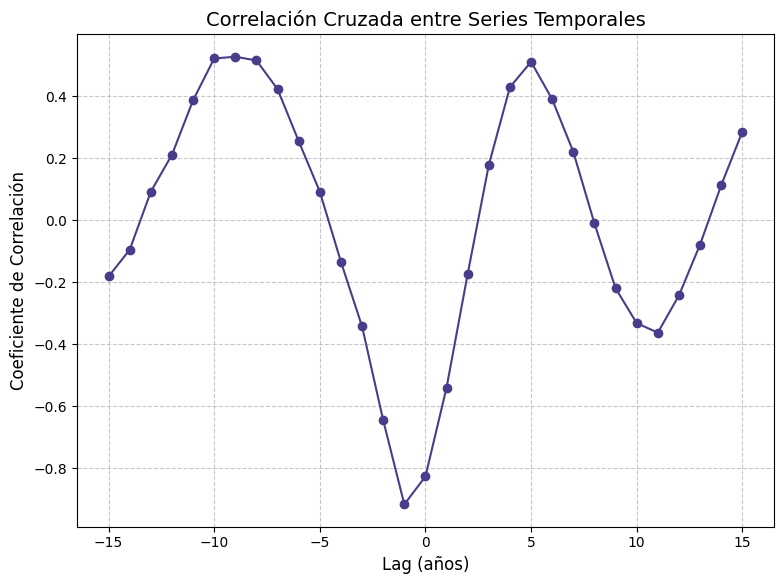

In [19]:

lag_range_oy = list(range(-max_lag, max_lag + 1))
plt.plot(lag_range_oy, cross_correlations_oy, marker='o', linestyle='-', color='darkslateblue')  # Personaliza el color a tu elección
plt.xlabel('Lag (años)')
plt.ylabel('Coeficiente de Correlación')
plt.title('Correlación Cruzada entre Series Temporales')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()


# Correlación Auger - Sunspots

In [70]:
merged

,date,sunspots,solarw,CRI,oulu
0,1818-01-01,NaN,NaN,NaN,NaN
1,1818-01-02,NaN,NaN,NaN,NaN
2,1818-01-03,NaN,NaN,NaN,NaN
3,1818-01-04,NaN,NaN,NaN,NaN
4,1818-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
75143,2023-09-26,17.2,462.0,1661.799868,NaN
75144,2023-09-27,18.3,455.0,1661.799868,NaN
75145,2023-09-28,9.4,394.0,1661.799868,NaN
75146,2023-09-29,9.0,431.0,1661.799868,NaN


In [71]:
##### FILTRADOOOOO
# Filtrando los datos para el rango de años de enero de 2006 a septiembre de 2021
start_date = '2006-01-01'
end_date = '2021-09-30'
df = merged[(merged['date'] >= start_date) & (merged['date'] <= end_date)]
df.set_index('date', inplace=True)
df = df.astype('float64') # 

In [21]:
# Establece el rango máximo de desplazamiento que deseas explorar
max_lag = 365  # Puedes ajustar esto según tus necesidades

# Inicializa una lista para almacenar los coeficientes de correlación cruzada
cross_correlations = []


# Calcula las medias de ambas series
mean_CRI = df["CRI"].mean()
mean_sunspots = df["sunspots"].mean()

# Calcula las desviaciones estándar de ambas series
std_CRI = df["CRI"].std()
std_sunspots = df["sunspots"].std()

# 6. Aplicar la fórmula de correlación cruzada para cada desplazamiento (\Delta)
for lag in range(-max_lag, max_lag + 1):
    sum_product = 0
    valid_data_count = 0

    for i in range(len(df) - abs(lag)):
        diff_CRI = df["CRI"].iloc[i] - mean_CRI
        diff_sunspots = df["sunspots"].iloc[i + lag] - mean_sunspots

        if not (np.isnan(diff_CRI) or np.isnan(diff_sunspots)):
            sum_product += diff_CRI * diff_sunspots
            valid_data_count += 1

    # Calcular el coeficiente de correlación cruzada para el desplazamiento actual
    if valid_data_count > 0:
        cross_corr = (1 / (valid_data_count - 1)) * (sum_product / (std_CRI * std_sunspots))
        cross_correlations.append(cross_corr)
    else:
        cross_correlations.append(np.nan)

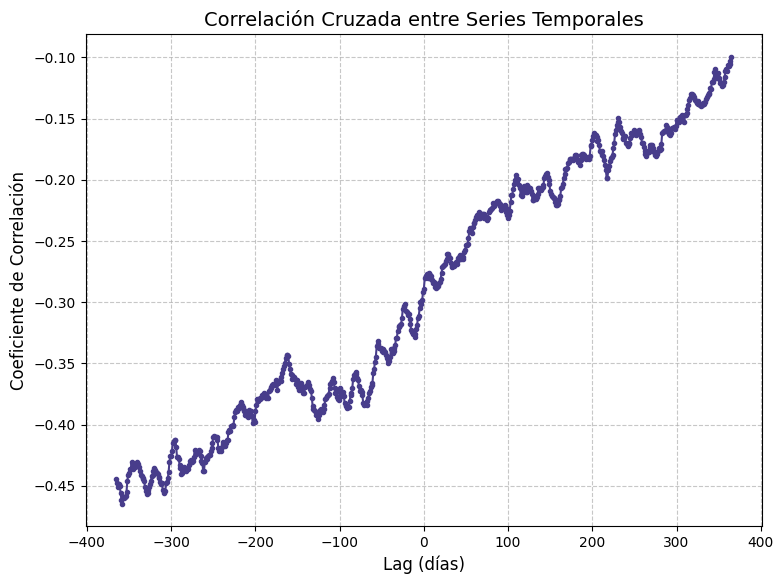

In [23]:
lag_range = list(range(-max_lag, max_lag + 1))
plt.plot(lag_range, cross_correlations, marker='.', linestyle='-', color='darkslateblue')  # Personaliza el color a tu elección
plt.xlabel('Lag (días)')
plt.ylabel('Coeficiente de Correlación')
plt.title('Correlación Cruzada entre Series Temporales')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()

## Pierre Auger sampling anual

In [72]:
df_auger = df.resample('Y').mean()  # Cambia 'mean' por 'sum' u otras métricas según lo que necesites.
df_auger

,sunspots,solarw,CRI,oulu
date,,,,
2006-12-31,3.005753,430.843836,1643.782948,1.030727
2007-12-31,2.395616,441.041096,1647.648061,1.055341
2008-12-31,2.212022,450.057377,1657.470814,1.060059
2009-12-31,2.283836,364.219178,1674.297149,1.082823
2010-12-31,3.018356,403.304110,1661.445049,1.053963
2011-12-31,6.160822,420.249315,1654.811777,1.020987
2012-12-31,6.085246,408.161202,1652.856468,0.997601
2013-12-31,6.419452,396.745205,1660.833710,0.988059
2014-12-31,7.628767,398.189041,1652.678047,0.978943


In [73]:
# Establece el rango máximo de desplazamiento que deseas explorar
max_lag = 11  # Puedes ajustar esto según tus necesidades

# Inicializa una lista para almacenar los coeficientes de correlación cruzada
cross_correlations_a = []


# Calcula las medias de ambas series
mean_CRI_a = df_auger["CRI"].mean()
mean_sunspots_a = df_auger["sunspots"].mean()

# Calcula las desviaciones estándar de ambas series
std_CRI_a = df_auger["CRI"].std()
std_sunspots_a = df_auger["sunspots"].std()

# 6. Aplicar la fórmula de correlación cruzada para cada desplazamiento (\Delta)
for lag in range(-max_lag, max_lag + 1):
    sum_product_a = 0
    valid_data_count_a = 0

    for i in range(len(df_auger) - abs(lag)):
        diff_CRI_a = df_auger["CRI"].iloc[i] - mean_CRI_a  # Corrección aquí
        diff_sunspots_a = df_auger["sunspots"].iloc[i + lag] - mean_sunspots_a

        if not (np.isnan(diff_CRI_a) or np.isnan(diff_sunspots_a)):
            sum_product_a += diff_CRI_a * diff_sunspots_a
            valid_data_count_a += 1

    # Calcular el coeficiente de correlación cruzada para el desplazamiento actual
    if valid_data_count_a > 0:
        cross_corr_a = (1 / (valid_data_count_a - 1)) * (sum_product_a / (std_CRI_a * std_sunspots_a))
        cross_correlations_a.append(cross_corr_a)
    else:
        cross_correlations_a.append(np.nan)


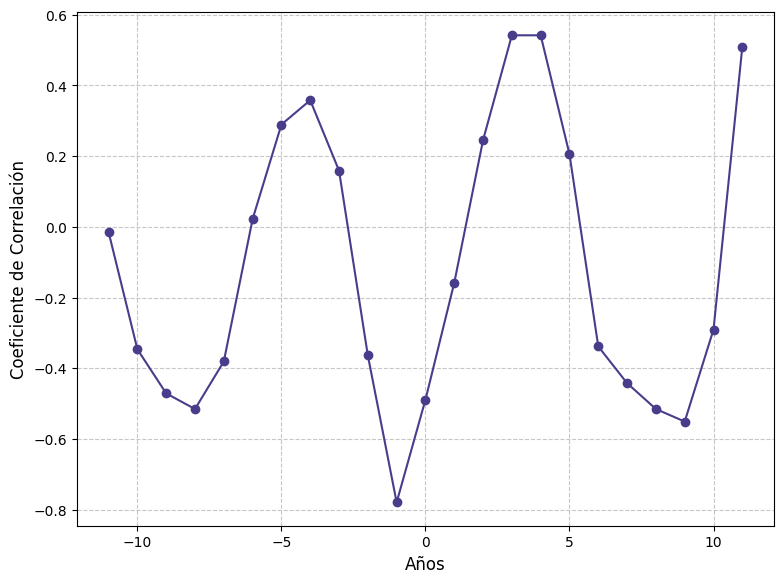

In [81]:
configure_plots()

lag_range_a = list(range(-max_lag, max_lag + 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(lag_range_a, cross_correlations_a, marker='o', linestyle='-', color='darkslateblue')  # Personaliza el color a tu elección
plt.xlabel('Años')
plt.ylabel('Coeficiente de Correlación')
plt.title('')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt. savefig('CRI_SN_crosscorr.png')
plt. savefig('CRI_SN_crosscorr.pdf')
plt.show()

### CODE TEST

In [64]:
import numpy as np
import pandas as pd

# Parámetros
amplitude1 = 1.0
amplitude2 = 1.0
frequency = 0.1  # Frecuencia en ciclos por unidad de tiempo
phase_shift = np.pi  # Desfase de 45 grados para generar anticorrelación
num_points = 100

# Generar el tiempo
time = np.arange(0, num_points)

# Generar las dos series sinusoidales
series1 = amplitude1 * np.sin(2 * np.pi * frequency * time)
series2 = amplitude2 * np.sin(2 * np.pi * frequency * time + phase_shift)

# Crear un DataFrame
data = {'Time': time, 'Series1': series1, 'Series2': series2}
test = pd.DataFrame(data)

# Añadir ruido aleatorio para hacerlo más realista (opcional)
#noise = np.random.normal(0, 0.1, num_points)
#test['Series1'] += noise
#test['Series2'] += noise

# Visualizar las primeras filas del DataFrame
print(test.head())

# Ahora puedes usar el código de correlación cruzada que mencionaste para analizar estas series.


   Time   Series1       Series2
0     0  0.000000  1.224647e-16
1     1  0.587785 -5.877853e-01
2     2  0.951057 -9.510565e-01
3     3  0.951057 -9.510565e-01
4     4  0.587785 -5.877853e-01


(0.0, 10.0)

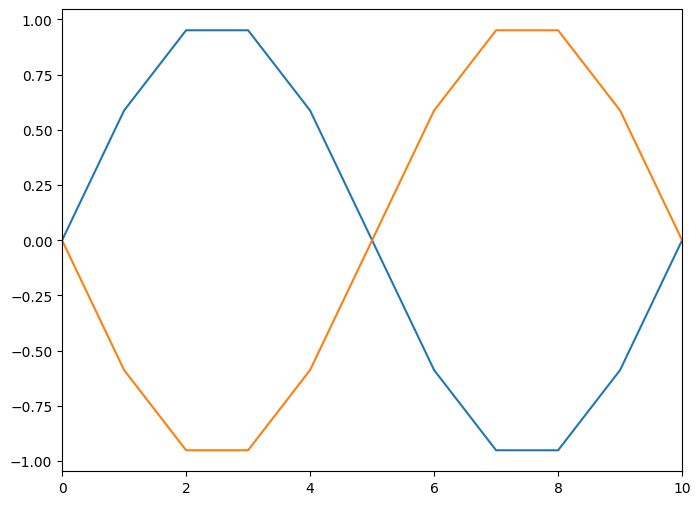

In [65]:
plt.plot(test['Time'],test['Series1'])
plt.plot(test['Time'],test['Series2'])
plt.xlim(0, 10)

In [66]:
# Establece el rango máximo de desplazamiento que deseas explorar
max_lag = 5  # Puedes ajustar esto según tus necesidades

# Inicializa una lista para almacenar los coeficientes de correlación cruzada
cross_correlations_t = []


# Calcula las medias de ambas series
mean_CRI_t = test['Series1'].mean()
mean_sunspots_t = test['Series2'].mean()

# Calcula las desviaciones estándar de ambas series
std_CRI_t = test['Series1'].std()
std_sunspots_t = test['Series2'].std()

# 6. Aplicar la fórmula de correlación cruzada para cada desplazamiento (\Delta)
for lag in range(-max_lag, max_lag + 1):
    sum_product_t = 0
    valid_data_count_t = 0

    for i in range(len(test) - abs(lag)):
        diff_CRI_t = test['Series1'].iloc[i] - mean_CRI_t
        diff_sunspots_t = test['Series2'].iloc[i + lag] - mean_sunspots_t

        if not (np.isnan(diff_CRI_t) or np.isnan(diff_sunspots_t)):
            sum_product_t += diff_CRI_t * diff_sunspots_t
            valid_data_count_t += 1

    # Calcular el coeficiente de correlación cruzada para el desplazamiento actual
    if valid_data_count_t > 0:
        cross_corr_t = (1 / (valid_data_count_t - 1)) * (sum_product_t / (std_CRI_t * std_sunspots_t))
        cross_correlations_t.append(cross_corr_t)
    else:
        cross_correlations_t.append(np.nan)

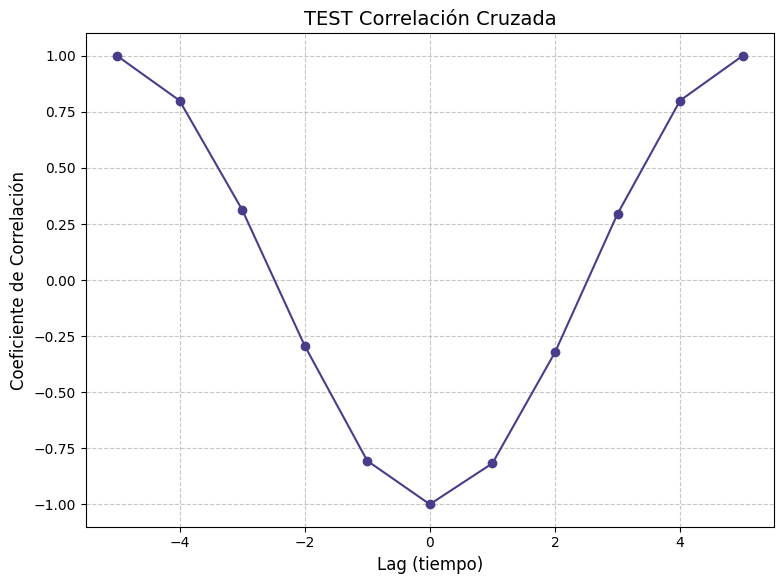

In [67]:
lag_range_t = list(range(-max_lag, max_lag + 1))
plt.plot(lag_range_t, cross_correlations_t, marker='o', linestyle='-', color='darkslateblue')  # Personaliza el color a tu elección
plt.xlabel('Lag (tiempo)')
plt.ylabel('Coeficiente de Correlación')
plt.title('TEST Correlación Cruzada')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()
